# Schenberg's movement equations 

In [1]:
using PyPlot, Statistics, LinearAlgebra


## Physical constants

In [2]:
kB = 1.38064852e-23        # m^2kgs^(-2)K^(-1). Boltzman constant
hbar = 6.62607004e-34/2π;  # m^2kg/s. Reduced Plank's constant


## Sphere parameters

In [3]:
R = 0.325                                              # m. Sphere radius
MS = 1150                                              # kg. Sphere mass
V = 4π/3*R^3                                           # m^3. Sphere volume
ρ = 8065.68                                            # kg/m^3. Sphere density
f0n =[3172.5, 3183.0, 3213.6, 3222.9, 3240.0]          # measured natural frequencies
ω0n = 2π*f0n
f0 = mean(f0n)                                         # mean of natural frequencies, transducers frequencies
ω0 = 2π*f0                                             # angular frequencies
#ω0n = ω0*ones(5) # teste as frequências degeneradas retirar depois
Q = 1.23e6                                             # mechanical Q
T = 4.2                                                # Sphere temperature 
α = 2.86239                                            # radial component α(r) in r=R 
χ = 0.60138            
Meff = 5/6*(χ/2)*V*ρ;                                  # kg. effective mass of the sphere
β = ω0/2Q 


0.008189595678431149

## Ressonator's parameters

In [4]:
MR2 = 0.0000123                                       # kg. second ressonator mass
MR1 = sqrt(Meff*MR2)                                  # kg. first ressonator mass                          
μ = sqrt(MR1/Meff)                                    # mass ratio
ν = sqrt(MS/Meff)
ωR1 = ω0
ωR2 = ω0
QR1 = 10^6
QR2 = 10^5;


## Mechanical coefficients

In [5]:
nR = 6                          # number of transducers
nm = 5                          # number of sphere modes
kS = MS*ω0n.^2                   # kg/s^2. sphere spring constant
kR1 = MR1*ωR1^2                 # kg/s^2. first ressonator spring constant
kR2 = MR2*ωR2^2                 # kg/s^2. second ressonator spring constant
HS=MS*ω0/Q                      # coeficiente de amortecimento da esfera em kg m/s
HR1=MR1*ωR1/QR1                 # coeficiente de amortecimento do primeiro ressonador em kg m/s
HR2=MR2*ωR2/QR2;                # coeficiente de amortecimento do segundo ressonador em kg m/s


## Model matrix
### Ressonators position

### Cartesian coordinates of transducer's positions
These expressions comes from the maxima program $\sf BMatrixProp.wxmx$

In [6]:
phi = (1+√5)/2   # golden ratio
x = [-(sqrt(3)*phi*sqrt(5*phi^2+4*phi+1)-2*phi-1)/(2*sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     -(phi^2+phi)/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     (sqrt(3)*phi*sqrt(5*phi^2+4*phi+1)+2*phi+1)/(2*sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     (sqrt(3)*sqrt(5*phi^2+4*phi+1)-phi^2)/(2*sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     -(sqrt(3)*sqrt(5*phi^2+4*phi+1)+phi^2)/(2*sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     phi^2/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1))]
y = [(phi*sqrt(5*phi^2+4*phi+1)+2*sqrt(3)*phi+sqrt(3))/(2*sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     -(sqrt(3)*phi^2+sqrt(3)*phi)/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     -(phi*sqrt(5*phi^2+4*phi+1)-2*sqrt(3)*phi-sqrt(3))/(2*sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     -(sqrt(5*phi^2+4*phi+1)+sqrt(3)*phi^2)/(2*sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     (sqrt(5*phi^2+4*phi+1)-sqrt(3)*phi^2)/(2*sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     (sqrt(3)*phi^2)/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1))]
z = [phi/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
     -(phi^2-2*phi-1)/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
       phi/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
      (2*phi^2+phi)/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
      (2*phi^2+phi)/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1)),
      (phi^2+2*phi+1)/(sqrt(phi^2+1)*sqrt(5*phi^2+4*phi+1))]


6-element Array{Float64,1}:
 0.18759247408507992
 0.18759247408507992
 0.18759247408507992
 0.7946544722917662
 0.7946544722917662
 0.7946544722917662

The $\phi$ angles are

In [7]:
ϕ = atan.(y,x)*180/π


6-element Array{Float64,1}:
  120.00000000000001
 -120.00000000000001
   -1.5016542219611606e-15
  -60.00000000000001
  180.0
   59.99999999999999

The $\theta$ angles are

In [8]:
θ = acos.(z)*180/π


6-element Array{Float64,1}:
 79.18768303642831
 79.18768303642831
 79.18768303642831
 37.377368140649686
 37.377368140649686
 37.377368140649686

### Model matrix

In [9]:
B = zeros(5,6)
B[1,:] = sqrt(15/16π)*(x.^2-y.^2)
B[2,:] = sqrt(15/16π)*(2*x.*y)
B[3,:] = sqrt(15/16π)*(2*y.*z)
B[4,:] = sqrt(15/16π)*(2*x.*z)
B[5,:] = sqrt(15/16π)*(3*z.^2 .- 1)/(sqrt(3));


### B transpose

In [10]:
BT = B'
B*BT/(3/2π)


5×5 Array{Float64,2}:
  1.0          -2.03459e-16   8.71967e-17  -9.44631e-17   3.6332e-17
 -2.03459e-16   1.0          -2.90656e-17  -1.45328e-17  -2.90656e-17
  8.71967e-17  -2.90656e-17   1.0           5.81311e-17   0.0
 -9.44631e-17  -1.45328e-17   5.81311e-17   1.0          -2.90656e-17
  3.6332e-17   -2.90656e-17   0.0          -2.90656e-17   1.0

## Eletronic

In [11]:
F3T = 3206.3                                  # frequência do transdutor 
w3T = 2π*F3T                                  # frequência angular do transdutor
w3Tsq = w3T^2                                 # quadrado da frequência angular do transdutor

FO1 = 3172.5
FO2 = 3240.0                                  # f- e f+ do transdutor
wO1 = 2π*FO1        
wO2 = 2π*FO2

Fpump = 10e9                                  # frequência da bomba
wpump = 2π*Fpump                              # frequência angular da bomba
wpumpsq = wpump^2                             # quadrado da frequência angular da bomba
Betae = 0.3                                   # fator de acoplamento elétrico
dfdx = 7.26e14                                # shift de frequência com a distância
Pinc = 5e-9                                   # potência incidente do oscilador
Tamp = 8                                      # temperatura de ruído do amplificador
Qe = 3e5                                      # electrical quality factor
Spm = 10^(-13.0)                              # densidade espectral do ruído de fase
Sam = 10^(-14.0)                              # densidade espectral do ruído de amplitude
Lamp = 0.5
Sseries = Lamp*(Tamp*kB/Pinc)*(Fpump/2/Qe/dfdx)^2  # densidade espectral do ruído de "series"

Qfac = (Qe^2/(1+4*Qe^2*ω0^2/wpump^2))^0.5
beta0 = (4*Betae*Pinc)/((1+Betae)*MR2*ω0^2*wpump)*((2*Qfac*dfdx)/(Fpump))^2
w3 = w3T*(1-(3*3^0.5*beta0)/(16))^0.5

Dw = 50000*2π
DUO1 = (Dw+wO1)/wpump  
DLO1 = (Dw-wO1)/wpump
D0 = Dw/wpump

ab1 = w3^2/wO1
ac1 = wO1^2/wpump^2 
ad1 = (1+4*Qe^2*ac1)
bb1 = (beta0*ab1*ad1)
bb3 = 2*(1+4*Qe^2*D0^2)
bbO1 = bb1/bb3  
bcU1 = (2*Qe*DUO1)^2+1
bcL1 = (2*Qe*DLO1)^2+1 
bcUO1 = 1/bcU1
bcLO1 = 1/bcL1  

ZmR = -1*bbO1*(bcUO1-bcLO1)
ZmI = -im*(bbO1*2*Qe*DUO1*(bcUO1-bcLO1))

Sbaction = Pinc^2/2/wpump^2*(2*Qe*dfdx/Fpump)^2*Sam;       # double sided  


## Detector model
### Solution of the movement equation
The movement equation is (see Merkowitz & Johnson (1995), Cesar Costa (2005), Claudemir (2006))
$$
 {\bf M}'\ddot{\boldsymbol{x}}+{\bf H}'\dot{\boldsymbol{x}}+{\bf K}'\boldsymbol{x}={\bf P}\boldsymbol{F}
$$
where
$$
    \boldsymbol{x}=\left[
        \begin{array}{c}
            \boldsymbol{a}\\ \boldsymbol{q}_{R_1} \\ \boldsymbol{q}_{R_2} 
        \end{array}\right]
$$
$$
    {\bf M}'=\left[
        \begin{array}{ccc}
            M_S\,{\bf I}              & {\bf 0}         & {\bf 0} \\
            M_{R_1}\alpha {\bf B}^T   & M_{R_1}{\bf I}  & {\bf 0} \\
            M_{R_2}\alpha {\bf B}^T   & M_{R_2}{\bf I}  & M_{R_2}{\bf I}
        \end{array}\right]
$$ 
Let us rewrite this matrix in term of the effective mass $M_S=\nu^2 M_{\rm eff}$ and the ratios 
$$\mu^2=\frac{M_{R_1}}{M_{\rm eff}}=\frac{M_{R_2}}{M_{R_1}}$$
$$
    {\bf M}'=M_{\rm eff}\left[
        \begin{array}{ccc}
            \nu^2\,{\bf I}              & {\bf 0}         & {\bf 0} \\
            \mu^2\alpha {\bf B}^T     & \mu^2{\bf I}  & {\bf 0} \\
            \mu^4\alpha {\bf B}^T     & \mu^4{\bf I}  & \mu^4{\bf I}
        \end{array}\right]=M_{\rm eff}{\bf M}
$$
$$
    {\bf K}'=\left[
        \begin{array}{ccc}
            {\rm diag}(\boldsymbol{k}_S)  & -k_{R_1}\alpha{\bf B} & {\bf 0} \\
            {\bf 0}   & k_{R_1}{\bf I}        & -k_{R_2}{\bf I} \\
            {\bf 0}   & {\bf 0}               & k_{R_2}{\bf I}
        \end{array}\right]
$$
or
$$
    {\bf K}'=M_{\rm eff}\omega_0^2\left[
       \begin{array}{ccc}
       \nu^2{\rm diag}\left(\frac{\omega_n^2}{\omega_0^2}\right)  & -\mu^2\alpha{\bf B} & {\bf 0} \\
            {\bf 0}   & \mu^2{\bf I}        & -\mu^4{\bf I} \\
            {\bf 0}   & {\bf 0}               & \mu^4{\bf I}
       \end{array}\right]=M_{\rm eff}\omega_0^2{\bf K}
$$
$$
    {\bf H}'=\left[
        \begin{array}{ccc}
            {\rm diag}(\boldsymbol{H}_S)      & -H_{R_1}\alpha{\bf B} & {\bf 0} \\
            {\bf 0}   & H_{R_1}{\bf I}        & -H_{R_2}{\bf I} \\
            {\bf 0}   & {\bf 0}               & H_{R_2}{\bf I}
        \end{array}\right]
$$
or
$$
    {\bf H}'=M_{\rm eff}\frac{\omega_0}{Q}\left[
        \begin{array}{ccc}
        \nu^2{\rm diag}\left(\frac{\omega_nQ}{\omega_0Q_n}\right) & -\mu^2\frac{Q}{Q_{R_1}}\alpha{\bf B} & {\bf 0} \\
            {\bf 0}   & \mu^2\frac{Q}{Q_{R_1}}{\bf I}        & -\mu^4\frac{Q}{Q_{R_2}}{\bf I} \\
            {\bf 0}   & {\bf 0}               & \mu^4\frac{Q}{Q_{R_2}}{\bf I}
        \end{array}\right]=M_{\rm eff}\frac{\omega_0}{Q}{\bf H}
$$
We can see that if we approximate 
$$
    \frac{\omega_n}{\omega_0}=\frac{Q}{Q_n},\qquad\frac{Q}{Q_{R_1}}=1,\qquad\frac{Q}{Q_{R_2}}=1
$$
Then ${\bf H}={\bf K}$ and 
$$
    {\bf P}=\left[
        \begin{array}{ccc}
            {\bf I}  & -\alpha{\bf B} & {\bf 0} \\
            {\bf 0}   & {\bf I}       & -{\bf I} \\
            {\bf 0}   & {\bf 0}       & {\bf I}
        \end{array}\right]
$$
$$
    \boldsymbol{F}=\left[
        \begin{array}{c}
            \boldsymbol{F}_S\\ \boldsymbol{F}_{R_1} \\ \boldsymbol{F}_{R_2} 
        \end{array}\right]
$$
The movement equation then reads
$$
 M_{\rm eff}{\bf M}\ddot{\boldsymbol{x}}+M_{\rm eff}\frac{\omega_0}{Q}{\bf K}\dot{\boldsymbol{x}}+
 M_{\rm eff}\omega_0^2{\bf K}\boldsymbol{x}={\bf P}\boldsymbol{F}
$$
We will need to diagonalize the matrix ${\bf M}^{-1}\bf K$, but this matrix is not symmetric. In order to symmetrize it we change the coordinates defining $\boldsymbol{x}={\bf N}\boldsymbol{y}$ where 
$$
    {\bf N}=\left[
        \begin{array}{ccc}
            {\bf I}/\nu  & {\bf 0}        & {\bf 0} \\
            {\bf 0}   & {\bf I}/\mu   & {\bf 0} \\
            {\bf 0}   & {\bf 0}                & {\bf I}/\mu^2
        \end{array}\right]
$$
and pre multiply by $\bf N$
$$
 M_{\rm eff}{\bf NMN}\ddot{\boldsymbol{y}}+M_{\rm eff}\frac{\omega_0}{Q}{\bf NKN}\dot{\boldsymbol{y}}+
 M_{\rm eff}\omega_0^2{\bf NKN}\boldsymbol{y}={\bf NP}\boldsymbol{F}
$$

In [12]:
eye(n) = one(zeros(n,n)) 


eye (generic function with 1 method)

In [13]:
N = [eye(nm)/ν        zeros(nm, nR)       zeros(nm, nR);
     zeros(nR,nm)     eye(nR)/μ           zeros(nR,nR);
     zeros(nR,nm)     zeros(nR,nR)        eye(nR)/μ^2]
iN = N^-1;


In [14]:
M = [ν^2*eye(nm) zeros(nm,nR) zeros(nm,nR);
     μ^2*α*BT    μ^2*eye(nR)  zeros(nR, nR);
     μ^4*α*BT    μ^4*eye(nR)  μ^4*eye(nR)]
iM = M^-1;


In [15]:
K = [ν^2*diagm(ω0n.^2 ./ ω0.^2)   -μ^2*α*B                 zeros(nm, nR);
     zeros(nR,nm)                  μ^2*eye(nR)            -μ^4*eye(nR);
     zeros(nR,nm)                  zeros(nR,nR)            μ^4*eye(nR)];


In [16]:
H = K;


In [17]:
P = [eye(nm)      -α*B           zeros(nm,nR);
     zeros(nR,nm)  eye(nR)      -eye(nR);
     zeros(nR,nm)  zeros(nR,nR)  eye(nR)]
iP = P^-1;


Multiplying both sides of the equation by $\bf (NMN)^{-1}$ and defining $2\beta=\frac{\omega_0}{Q}$ we get
$$
 M_{\rm eff}{\bf NMN}\ddot{\boldsymbol{y}}+2\beta M_{\rm eff}{\bf NKN}\dot{\boldsymbol{y}}+
 M_{\rm eff}\omega_0^2{\bf NKN}\boldsymbol{y}={\bf NP}\boldsymbol{F}
$$
Let us define the variables ${\bf M}_y$, ${\bf K}_y$ and ${\bf P}_y$, where the subscript is the indicative that these matrices are of the equation for $\boldsymbol{y}$. The equation then reads
$$
 M_{\rm eff}{\bf M}_y\ddot{\boldsymbol{y}}+2\beta M_{\rm eff}{\bf K}_y\dot{\boldsymbol{y}}+
 M_{\rm eff}\omega_0^2{\bf K}_y\boldsymbol{y}={\bf P}_y\boldsymbol{F}
$$


In [18]:
My = N*M*N
Ky = N*K*N
Py = N*P;


Multiply both sides by ${\bf M}_y^{-1}$
$$
 M_{\rm eff}\ddot{\boldsymbol{y}}+2\beta M_{\rm eff}{\bf M}_y^{-1}{\bf K}_y\dot{\boldsymbol{y}}+
 M_{\rm eff}\omega_0^2{\bf M}_y^{-1}{\bf K}_y\boldsymbol{y}=
 {\bf M}_y^{-1}{\bf P}_y\boldsymbol{F}
$$
Define ${\bf K}_z={\bf M}_y^{-1}{\bf K}_y$ and ${\bf P}_z={\bf M}_y^{-1}{\bf P}_y$
$$
 M_{\rm eff}\ddot{\boldsymbol{y}}+2\beta M_{\rm eff}{\bf K}_z\dot{\boldsymbol{y}}+
 M_{\rm eff}\omega_0^2{\bf K}_z\boldsymbol{y}={\bf P}_z\boldsymbol{F}
$$

If the sphere frequencies are degenerate the matrix ${\bf K}_z$ is symmetric, but if we use measured frequencies it is not, in fact

In [19]:
Kz = My^-1*Ky
Pz = My^-1*Py;


In [20]:
sum(abs.(Kz-Kz'))


0.004348544500094459

If we use the measured frequencies the entry ${\bf K}_{z12}\neq{\bf K}_{z21}$. But if we use the mean value of the frequencies, $\omega_0$, for these two entries, the matrix is still symmetric. This is important for the eigenvectors be orthogonal. Let us use the natural frequencies measured $\omega_{0n}$ only in ${\bf K}_{z11}$.

In [21]:
for n in 1:5
    Kz[n,n] = ω0n[n]^2 / ω0^2
end


Let the modal matrix $\bf U$ diagonalize ${\bf K}_z$

In [22]:
Kz = (Kz+Kz')/2      # eigen is very sensitive to very small asymmetries       
ω2, U = eigen(Kz)
f17 =ω0*sqrt.(ω2)/2π


17-element Array{Float64,1}:
 3158.446073555519
 3164.9283163261425
 3175.6219172635365
 3177.1056915692407
 3178.8441213380265
 3183.4873905592453
 3193.051252651603
 3196.1368932200744
 3210.140431109917
 3214.357540861673
 3219.9928411738265
 3229.477519053068
 3234.131464613305
 3235.0633215339913
 3240.9654106714797
 3244.5642875622116
 3254.2901126119687

Insert ${\bf I}={\bf U}{\bf U}^T$ in the equation and pre multiply by ${\bf U}^T$
$$
 M_{\rm eff}{\bf U}^T\ddot{\boldsymbol{y}}+
 2\beta M_{\rm eff}{\bf U}^T{\bf K}_z{\bf U}{\bf U}^T\dot{\boldsymbol{y}}+
 M_{\rm eff}\omega_0^2{\bf U}^T{\bf K}_z{\bf U}{\bf U}^T\boldsymbol{y}=
 {\bf U}^T{\bf P}_z\boldsymbol{F}
$$
Rewrite in terms of the normal coodinates $\boldsymbol{z}={\bf U}^T\boldsymbol{y}$, define the diagonal matrix
${\bf D}={\bf U}^T{\bf K}_z{\bf U}$ and take the Fourier transform
$$
         (-M_{\rm eff}\omega^2{\bf I}+2j\beta M_{\rm eff}\omega{\bf D}+
         M_{\rm eff}\omega_0^2{\bf D})\boldsymbol{\tilde z}=
         {\bf U}^T{\bf P}_z\boldsymbol{\tilde F}
$$
We find $\boldsymbol{\tilde z}$
$$
        \boldsymbol{\tilde z}={\bf J}(\omega){\bf U}^T{\bf P}_z\boldsymbol{\tilde F}
$$
where
$$
    {\bf J}(\omega)=
    {\rm diag}\left(\frac{1}{-M_{\rm eff}\omega^2+2j\beta M_{\rm eff}\omega D_{11}+M_{\rm eff}\omega_0^2D_{11}},
    \cdots,\frac{1}{-M_{\rm eff}\omega^2+2j\beta M_{\rm eff}\omega D_{1717}+M_{\rm eff}\omega_0^2D_{1717}} \right)
$$
Returning to the old variables 
$$
    \boldsymbol{\tilde x}=
    {\bf NU}{\bf J}(\omega){\bf U}^T{\bf N}^{-1}{\bf M}^{-1}{\bf P}\boldsymbol{\tilde F}
$$

In [23]:
D = U'*Kz*U
# Inverse of J
function iJ(w)
    iJ = zeros(17,17)*im
    for k in 1:17
        iJ[k,k] = -Meff*w^2+2im*β*Meff*ω0*D[k,k]+Meff*ω0^2*D[k,k]
    end
    iJ
end
function J(w)
    J = zeros(17,17)*im
    for k in 1:17
        J[k,k] = 1/(-Meff*w^2+2im*β*Meff*ω0*D[k,k]+Meff*ω0^2*D[k,k])
    end
    J
end


J (generic function with 1 method)

In [24]:
D


17×17 Array{Float64,2}:
  0.970312     -1.89735e-15   4.64906e-16  …   1.30104e-17   1.04083e-17
 -1.90039e-15   0.974299      3.43475e-16     -2.498e-16     5.37764e-17
  4.66641e-16   3.60822e-16   0.980894         6.245e-17     1.11022e-16
  2.68015e-16   1.97758e-16  -1.77636e-15     -2.42861e-16  -8.32667e-17
  1.04083e-16   2.84495e-16  -6.10623e-16     -1.38778e-16  -9.71445e-17
 -6.50521e-16   5.20417e-16   2.28983e-15  …  -3.60822e-16  -7.28584e-17
 -2.04697e-16  -2.91434e-16  -1.17961e-16      7.97973e-17  -2.84495e-16
 -2.08167e-16  -1.21431e-16  -8.32667e-17      3.43475e-16   1.21431e-16
 -1.04083e-17   3.19189e-16   3.05311e-16     -4.16334e-17   2.77556e-17
  7.63278e-17   0.0           6.93889e-17     -1.11022e-16   6.245e-17
  1.75207e-16  -3.43475e-16  -2.77556e-17  …   1.80411e-16  -1.56125e-16
 -2.42861e-16  -1.17961e-16   2.77556e-17      1.249e-16    -3.22659e-16
  1.9559e-16   -1.51788e-16   7.63278e-17      4.33681e-17  -1.11022e-16
 -1.12757e-17   9.02056e-17  

Defining the transfer function ${\bf L}={\bf NU}{\bf J}(\omega){\bf U}^T{\bf N}^{-1}{\bf M}^{-1}{\bf P}$ results
$$
    \boldsymbol{\tilde x}={\bf L}(\omega)\boldsymbol{\tilde F}
$$
Explicitely
$$
     \left[
        \begin{array}{c}
            \boldsymbol{\tilde a}\\ \boldsymbol{\tilde q}_{R_1} \\ \boldsymbol{\tilde q}_{R_2} 
        \end{array}\right]=
    \left[
        \begin{array}{ccc}
            {\bf L}_{11}  & {\bf L}_{12}  & {\bf L}_{13} \\
            {\bf L}_{21}  & {\bf L}_{22}  & {\bf L}_{23} \\
            {\bf L}_{31}  & {\bf L}_{32}  & {\bf L}_{33}
        \end{array}\right]
   \left[
        \begin{array}{c}
            \boldsymbol{F}_S\\ \boldsymbol{F}_{R_1} \\ \boldsymbol{F}_{R_2} 
        \end{array}\right]    
$$
For using the fluctuation dissipation theorem is convenient tor write this expression in terms of the velocity
$$
    \boldsymbol{v}=\frac{d\boldsymbol{x}}{dt}
$$
Take the Fourier transform 
$$
    \boldsymbol{\tilde v}=j\omega\boldsymbol{\tilde x}
    \qquad\therefore\qquad
    \boldsymbol{\tilde x}=\frac{\boldsymbol{\tilde v}}{j\omega}
$$
Then
$$
    \boldsymbol{\tilde v}=j\omega{\bf L}(\omega)\boldsymbol{\tilde F}={\bf Y}(\omega)\boldsymbol{\tilde F}
$$
where ${\bf Y}$ is the admitance of the system.
### Detector sensitivity
The measurable quantity is $\boldsymbol{\tilde q}_{R_2}$ and when it only due to the GW it is
$$
     \left[
        \begin{array}{c}
            \boldsymbol{\tilde a}^{GW}\\ \boldsymbol{\tilde q}_{R_1}^{GW} \\ \boldsymbol{\tilde q}_{R_2}^{GW} 
        \end{array}\right]=
    \left[
        \begin{array}{ccc}
            {\bf L}_{11}  & {\bf L}_{12}  & {\bf L}_{13} \\
            {\bf L}_{21}  & {\bf L}_{22}  & {\bf L}_{23} \\
            {\bf L}_{31}  & {\bf L}_{32}  & {\bf L}_{33}
        \end{array}\right]
    \left[
        \begin{array}{c}
            \boldsymbol{F}_S\\ \boldsymbol{0} \\ \boldsymbol{0} 
        \end{array}\right]=
        \left[
        \begin{array}{c}
            {\bf L}_{11}\boldsymbol{F}_S \\ 
            {\bf L}_{21}\boldsymbol{F}_S \\ 
            {\bf L}_{31}\boldsymbol{F}_S 
        \end{array}\right]
$$
$$
    \boldsymbol{\tilde q}_{R_2}^{GW}={\bf L}_{31}\boldsymbol{F}_S^{GW}=
    \left(-\frac 12M_S\chi Rw^2\right){\bf L}_{31}\boldsymbol{h}
$$
When the filter is the matched filter the SNR can be written (see Usenko pag. 13, Zubakov pag. 85)
$$
    \rho^2=\frac{1}{2\pi}\int[\boldsymbol{0}\ \boldsymbol{0}\  \boldsymbol{\tilde q}_{R_2}^{GWH}]
    {\bf S}_{R_2R_2}^{-1}
    \left[
        \begin{array}{c}
            \boldsymbol{0}\\ \boldsymbol{0} \\ \boldsymbol{\tilde q}_{R_2}^{GW}
        \end{array}\right]dw.
$$
The fluctuation dissipation theorem stays that
$$
    {\bf S}_{R_2R_2}=\frac{4k_BT}{w^2}{\cal R}({\bf Y}(w))
$$
The sensitivity of the detector is obtained seaching for an input GW $\boldsymbol{h}$ that mimics the termal
noise at the output with $\rho = 1$ per bandwidth. In other words we search for an $\boldsymbol{h}$ such that
$$
    \boldsymbol{\tilde q}_{R_2}^{GWH}{\bf R}_{33}
    \boldsymbol{\tilde q}_{R_2}^{GW}=1
$$
where ${\bf R}={\bf S}_{R_2R_2}^{-1}$
Now we write this equation in terms of the input variables
$$
    \left(-\frac 12M_S\chi Rw^2\right)^2\boldsymbol{h}^H{\bf L}_{31}^H
    {\bf R}_{33}
    {\bf L}_{31}\boldsymbol{h}=1
$$
If we use $\boldsymbol{h}$ as a scalar function $h_S(w)$ times the sum of the eigenvectors ${\bf V}_i$ 
of the matrix ${\bf L}_{31}^H{\bf R}_{33}{\bf L}_{31}$
$$
    \boldsymbol{h}=h_S(w)({\bf V}_1+{\bf V}_2+{\bf V}_3+{\bf V}_4+{\bf V}_5+{\bf V}_6) 
$$
then 
$$
    \boldsymbol{h}^H{\bf L}_{31}^H{\bf R}_{33}{\bf L}_{31}\boldsymbol{h}=
    h_S^2(w){\rm Tr}({\bf L}_{31}^H{\bf R}_{33}{\bf L}_{31}).
$$
Then we obtain 
$$
    h_S(w)=\frac{1}{\left(\frac 12M_S\chi Rw^2\right)\sqrt{{\rm Tr}({\bf L}_{31}^H{\bf R}_{33}{\bf L}_{31})}}
$$

In [25]:
L(w) = N*U*J(w)*U'*iN*iM*P
iL(w) = iP*M*N*U*iJ(w)*U'*iN       # inverse of L
Y(w) = im*w*L(w)
Sxx(w) = 4kB*T/w^2*real(Y(w))
iSxx(w) = Sxx(w)^-1
L31(w) = L(w)[12:17,1:5]
R33(w) = iSxx(w)[12:17,12:17]
hS(w) = sqrt(1/abs(tr(L31(w)'*R33(w)*L31(w))))/(1/2*MS*χ*R*w^2)


hS (generic function with 1 method)

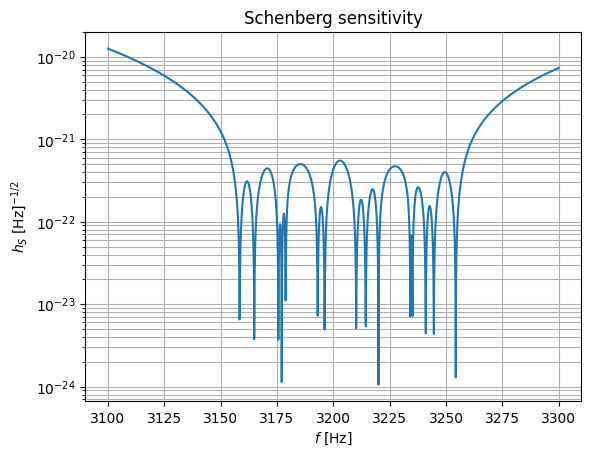

In [26]:
af = 3100:0.1:3300
ahs = zeros(length(af))
for (i,f) in enumerate(af)
    ahs[i] = hS(2π*f)
end
figure(1)
    semilogy(af,ahs)
    title("Schenberg sensitivity")
    xlabel(L"$f$ [Hz]")
    ylabel(L"$h_S$ [Hz]$^{-1/2}$")
    grid(true, which="minor")
    grid(true, which="both")
